In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import math

In [2]:
data = pd.read_table("EDYMod.msh.128.txt.loop_0.dat", sep=' ', header=None)
data = data.to_numpy()

x = data[:,0]
y = data[:,1]

In [3]:
n = len(x)
# make similarity matrix
sim = np.zeros((n,n))
for i in range (n):
  for j in range (n):
    sim[i,j] = np.linalg.norm(data[i]-data[j])


Сортирую точки при помощи поиска ближайшего соседа, алгоритм проходится по всем точкам, но в конце он начинает делать большие шаги до точек, до которых он не дошел при первом обходе

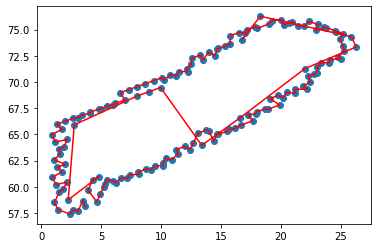

In [4]:
# sort data using knn method
from math import inf
sorted_data = [0]
while True:
  tmp = inf
  ind = -1
  
  for i in range (n):
    if i not in sorted_data:
      if sim[sorted_data[-1],i]<tmp:
        tmp = sim[sorted_data[-1],i]
        ind = i
        
  if ind>0:
    sorted_data.append(ind)
  else:
    break

plt.scatter(x,y)
plt.plot(x[sorted_data],y[sorted_data],c='r')
plt.show()

Поэтому надо остановиться, когда мы приближаемся к первому значению

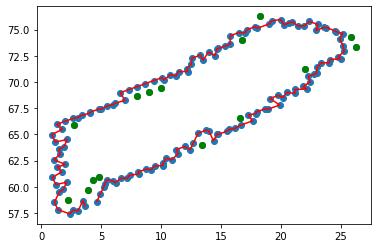

In [5]:
# sort data using knn method
from math import inf
sorted_data = [0]
while True:
  tmp = inf
  ind = -1
  
  for i in range (n):
    if i not in sorted_data:
      if sim[sorted_data[-1],i]<tmp:
        tmp = sim[sorted_data[-1],i]
        ind = i
  if len(sorted_data)>10 and sim[sorted_data[-1],0]<tmp:
    break
  if ind>0:
    sorted_data.append(ind)
  else:
    break

missed_data = np.arange(n)
md = np.delete(missed_data, missed_data[sorted_data])
plt.scatter(x,y)
plt.scatter(x[md],y[md],c='g')
plt.plot(x[sorted_data],y[sorted_data],c='r')
plt.show()

В этом случае мы можем пропустить точки. Поэтому можно пройтись по пропущенным точкам и вставить их между двумя смежными точками в отсортированном списке, так, чтобы прибавленное расстояние было минимальным из возможных.

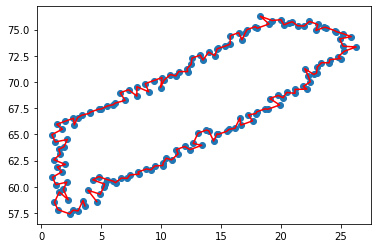

In [6]:
# improve knn method
from math import inf
sorted_data = [0]
while True:
  tmp = inf
  ind = -1
  
  for i in range (n):
    if i not in sorted_data:
      if sim[sorted_data[-1],i]<tmp:
        tmp = sim[sorted_data[-1],i]
        ind = i
  if len(sorted_data)>10 and sim[sorted_data[-1],0]<tmp:
    break
  if ind>0:
    sorted_data.append(ind)
  else:
    break

missed_data = np.arange(n)
md = np.delete(missed_data, missed_data[sorted_data])

for i in md:
  tmp = inf
  ind = -1
  for j in range (len(sorted_data)-1):
    ij = np.linalg.norm(data[i]-data[sorted_data[j]])
    ij1 = np.linalg.norm(data[i]-data[sorted_data[j+1]])
    if (ij + ij1)<tmp:
      tmp = ij +ij1
      ind = j                                                                         
  if np.linalg.norm(data[i]-data[sorted_data[j]])+np.linalg.norm(data[i]-data[0])<tmp:
    sorted_data.append(i)
  else:
    sorted_data.insert(ind+1,i)

missed_data = np.arange(n)
md = np.delete(missed_data, missed_data[sorted_data])
plt.scatter(x,y)
plt.scatter(x[md],y[md],c='g')
plt.plot(x[sorted_data],y[sorted_data],c='r')
plt.show()

Теперь KNN проходится по всем точкам, но все равно у нас могут быть "петли".

In [ ]:
simd = sim + np.diag([inf]*n)


Решение методом ветвей и граница(алгоритм Литтла)

In [7]:
#Функция нахождения минимального элемента, исключая текущий элемент
def Min(lst,myindex):
    return min(x for idx, x in enumerate(lst) if idx != myindex)

#функция удаления нужной строки и столбца
def Delete(matrix,index1,index2):
    del matrix[index1]
    for i in matrix:
        del i[index2]
    return matrix

#Функция вывода матрицы
def PrintMatrix(matrix):
    print("---------------")
    for i in range(len(matrix)):
        print(matrix[i])
    print("---------------")

matrix=[]
H=0
PathLenght=0
Str=[]
Stb=[]
res=[]
result=[]

n = len(data)
# n = 4 
# sim = [[0, 10, 1, 1], [10, 0, 1, 5], [1, 1, 0, 10], [1, 5, 10, 0]]
#Инициализируем массивы для сохранения индексов
for i in range(n):
    Str.append(i)
    Stb.append(i)

for i in range (n):
  matrix.append(sim[i].copy().tolist())

#Присваеваем главной диагонали float(inf)
for i in range(n): 
  matrix[i][i]=inf

while True:
    #Редуцируем
    #--------------------------------------
    #Вычитаем минимальный элемент в строках
    for i in range(len(matrix)):
        temp=min(matrix[i])
        H+=temp
        for j in range(len(matrix)):
            matrix[i][j]-=temp

    #Вычитаем минимальный элемент в столбцах    
    for i in range(len(matrix)):
        temp = np.min(matrix, axis=0)[i]
        H+=temp
        for j in range(len(matrix)):
            matrix[j][i]-=temp
    #--------------------------------------
	
    #Оцениваем нулевые клетки и ищем нулевую клетку с максимальной оценкой
    #--------------------------------------
    NullMax=0
    index1=0
    index2=0
    tmp=0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j]==0:
                tmp=Min(matrix[i],j)+Min((row[j] for row in matrix),i)
                if tmp>=NullMax:
                    NullMax=tmp
                    index1=i
                    index2=j
    #--------------------------------------

	#Находим нужный нам путь, записываем его в res и удаляем все ненужное
    res.append(Str[index1])
    res.append(Stb[index2])
	
    oldIndex1=Str[index1]
    oldIndex2=Stb[index2]
    if oldIndex2 in Str and oldIndex1 in Stb:
        NewIndex1=Str.index(oldIndex2)
        NewIndex2=Stb.index(oldIndex1)
        matrix[NewIndex1][NewIndex2]=inf
    del Str[index1]
    del Stb[index2]
    matrix=Delete(matrix,index1,index2)
    if len(matrix)==1:
      break

print(res)	
#Формируем порядок пути
for i in range(0,len(res)-1,2):
	if res.count(res[i])<2:
		# result.append(res[i])
		result.append(res[i+1])
for i in range(0,len(res)-1):
	for j in range(0,len(res)-1,2):
		if result[-1]==res[j]:
			# result.append(res[j])
			result.append(res[j+1])
for i in range(0,len(res)-1):
  if res[i] not in result:
    result.append(res[i])
    result.append(res[i+1])

  for j in range(0,len(res)-1,2):
    if result[-1]==res[j]:
			# result.append(res[j])
      result.append(res[j+1])
print("----------------------------------")
print(result)
#Считаем длину пути
# for i in range (n-2):
#   PathLenght+=sim[result[i]-1][result[i+1]-1]
# PathLenght+=sim[result[n-2]-1][result[n-1]-1]
# PathLenght+=sim[result[n-1]-1][result[0]-1]
# print(PathLenght)



[66, 84, 143, 13, 52, 100, 111, 43, 127, 26, 89, 62, 115, 37, 38, 114, 88, 63, 62, 88, 87, 64, 63, 87, 148, 149, 99, 53, 77, 0, 64, 86, 24, 129, 95, 56, 56, 96, 44, 110, 55, 97, 134, 20, 131, 22, 96, 95, 29, 123, 105, 48, 79, 70, 78, 79, 73, 72, 0, 73, 72, 78, 2, 77, 74, 156, 156, 2, 49, 104, 32, 119, 153, 154, 155, 3, 3, 4, 154, 155, 90, 89, 39, 113, 114, 39, 40, 41, 113, 40, 37, 38, 36, 116, 116, 115, 35, 36, 34, 117, 117, 35, 33, 118, 119, 33, 118, 34, 112, 42, 42, 111, 41, 112, 43, 44, 109, 45, 110, 109, 108, 46, 45, 108, 107, 106, 46, 107, 47, 105, 106, 47, 48, 49, 104, 103, 30, 122, 122, 121, 31, 120, 120, 32, 121, 31, 123, 30, 97, 98, 54, 55, 126, 27, 26, 126, 128, 25, 129, 128, 25, 127, 23, 130, 130, 24, 22, 23, 132, 131, 133, 21, 21, 132, 20, 133, 91, 61, 61, 90, 94, 57, 59, 94, 92, 60, 60, 91, 57, 59, 58, 93, 93, 92, 98, 58, 100, 99, 53, 54, 70, 69, 80, 71, 69, 80, 81, 68, 71, 81, 68, 82, 67, 83, 83, 66, 82, 67, 65, 85, 86, 65, 76, 1, 1, 75, 75, 74, 27, 125, 9, 8, 150, 7, 8, 

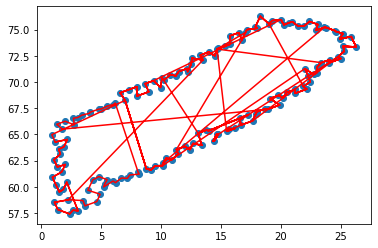

In [8]:
plt.scatter(x,y)
plt.plot(x[result],y[result],c='r')
plt.show()

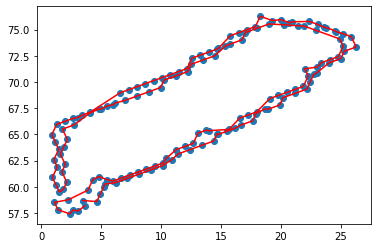

In [9]:
# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.

route = two_opt(data,0.001)
plt.scatter(x,y)
plt.plot(x[route],y[route],c='r')
plt.show()


In [10]:
# на что влияет второй параметр?
# find 2 points where route сгибается
# как сшить 2 линии?
checkpoints = []
par = 4
for i in range (par,n-par):
  for j in range (2,par):
    if sim[route[i-j],route[i+j]]>sim[route[i-j],route[i]] and sim[route[i-j],route[i+j]]>sim[route[i],route[i+j]]:
      continue
  if j==par:
    checkpoints.append(i)
checkpoints

[]

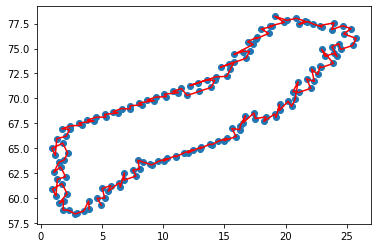

In [ ]:
mid = np.argmin(sim[0][4:])
data1 = data[:mid]
data2 = data[mid:]

sorted_data = np.arange(mid)
# print(sorted_data)
for i in range (mid,n):
  tmp = np.argmin(sim[i][sorted_data])
  # insert before tmp (may be we need to do it after)
  sorted_data = np.insert(sorted_data,tmp+1,i)

plt.scatter(x,y)
plt.plot(x[sorted_data],y[sorted_data],c='r')
plt.show()

In [ ]:
mid = np.argmin(sim[0][4:])
data1 = data[:mid]
data2 = data[mid:]

sorted_data = np.arange(mid)
missed_data = np.arange(n)
md = np.delete(missed_data, missed_data[sorted_data])

for i in md:
  tmp = inf
  ind = -1
  for j in range (len(sorted_data)-1):
    ij = np.linalg.norm(data[i]-data[sorted_data[j]])
    ij1 = np.linalg.norm(data[i]-data[sorted_data[j+1]])
    if (ij + ij1)<tmp:
      tmp = ij +ij1
      ind = j                                                                         
  if np.linalg.norm(data[i]-data[sorted_data[j]])+np.linalg.norm(data[i]-data[0])<tmp:
    sorted_data.append(i)
  else:
    sorted_data.insert(ind+1,i)

plt.scatter(x,y)
plt.plot(x[sorted_data],y[sorted_data],c='r')
plt.show()